In [1]:
import pandas as pd 
import numpy as np
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
from tqdm import tqdm
from tslearn.metrics import dtw

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [53]:
model_path = "/home/spankaew/Git/astrologics/models/dev/BN_TUTO_Fx/"
model_1 = le.LogicEnsemble(model_path, project_name = 'BN_TUTO_Fx')
model_1.create_simulation()
model_1.create_attractor()
model_1.attractor.get_attractors()

Simulation object created
Attractor object created


100%|██████████| 2240/2240 [00:29<00:00, 76.25it/s]


Concatenate results into matrix


100%|██████████| 2240/2240 [00:03<00:00, 644.42it/s]

Attractors calculation completed



/home/spankaew/Git/astrologics/astrologics/model_attractors.py:85: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.attractors_df = model_logic.fillna(0)


/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


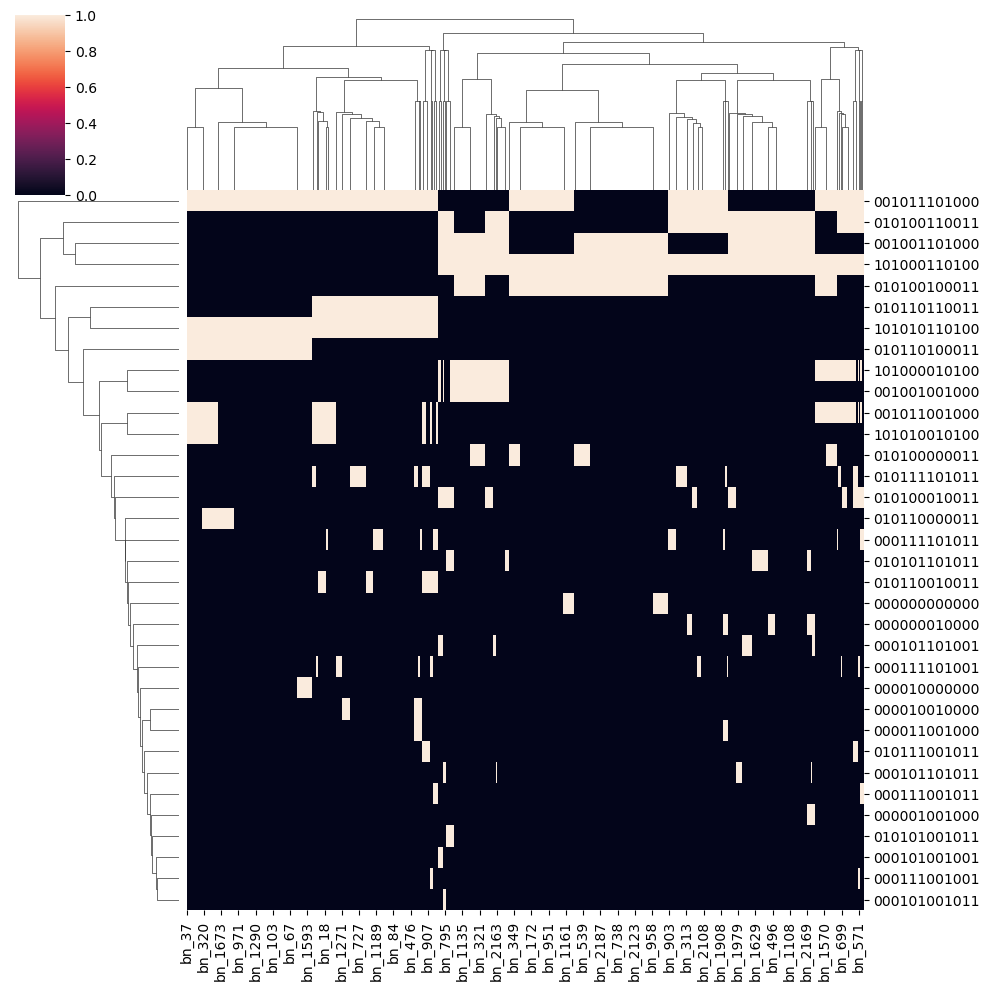

In [3]:
sns.clustermap(model_1.attractor.attractors_df)

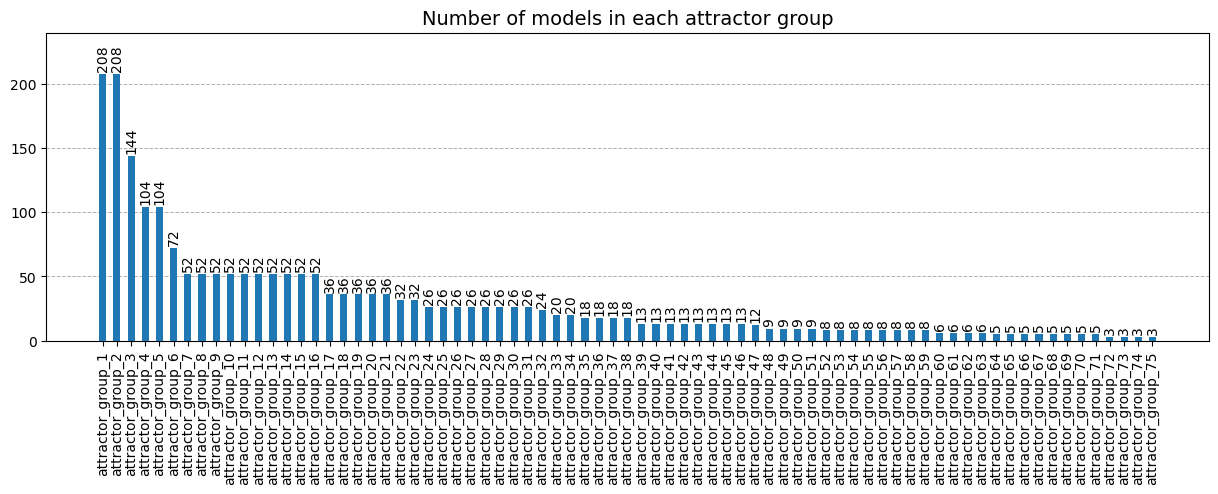

In [54]:
# Concatenate the columns of the attractors DataFrame into a single string for each column
concatenated_columns = model_1.attractor.attractors_df.apply(lambda col: ''.join(col.astype(str)), axis=0)

# Create a bar plot of the value counts of the concatenated columns
plt.figure(figsize=(15, 4))
vis_bar = concatenated_columns.value_counts().sort_values(ascending=False)
# Rename index to attractor_group_1, attractor_group_2, ..., attractor_group_n
vis_bar.index = [f"attractor_group_{i+1}" for i in range(len(vis_bar))]
bars = plt.bar(vis_bar.index, vis_bar.values, width = .5, zorder = 3)
plt.xticks(rotation=90)

# Add counts on top of each bar
for bar, count in zip(bars, vis_bar.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+2, str(count),
             ha='center', va='bottom', fontsize=10, rotation=90)

plt.grid(axis='y', zorder=0, linestyle='--', linewidth=0.7)
plt.ylim(0,240)
plt.title('Number of models in each attractor group', fontsize=14)
plt.savefig('/home/spankaew/Git/astrologics/figures/BNtuto_attractor_groups_count.png', bbox_inches='tight', dpi=600)
plt.savefig('/home/spankaew/Git/astrologics/figures/BNtuto_attractor_groups_count.pdf', bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Create a mapping from concatenated column patterns to attractor groups
vis_bar = concatenated_columns.value_counts().sort_values(ascending=False)
group_to_attractor = {f"attractor_group_{i+1}": pattern for i, pattern in enumerate(vis_bar.index)}
pattern_to_group = {v: k for k, v in group_to_attractor.items()}
concatenated_columns_grouped = concatenated_columns.map(pattern_to_group).to_dict()

# Rename the columns of the attractors DataFrame using the attractor pattern to group mapping
attractor_df = model_1.attractor.attractors_df.copy()
attractor_df.columns = [concatenated_columns_grouped[col] for col in attractor_df.columns]

# Concatenate the first column of each attractor group into a new DataFrame
concatenated_df = pd.DataFrame({group: attractor_df[group].iloc[:, 0] if hasattr(attractor_df[group], 'iloc') else attractor_df[group] for group in [f"attractor_group_{i+1}" for i in range(len(vis_bar))]})

# Plot the heatmap of the concatenated DataFrame
sns.clustermap(concatenated_df, figsize=(20, 10), cmap='viridis', col_cluster=False, linecolor='black', linewidths=0.5)
plt.savefig('/home/spankaew/Git/astrologics/figures/BNtuto_attractor_groups_heatmap.png', bbox_inches='tight', dpi=600)
plt.savefig('/home/spankaew/Git/astrologics/figures/BNtuto_attractor_groups_heatmap.pdf', bbox_inches='tight')
plt.show()
plt.close()

# Comparison between attractors identification and endpoint clustering

The simulation for the endpoint clustering is performed on the file `BNTuto_clustering_endpoint.py`.

In [ ]:
rand_index= pd.read_csv('/home/spankaew/Git/astrologics/tmp/rand_index_endpointclustering.csv')
rand_endpoint = np.trapezoid(rand_index, axis = 0)
plt.figure(figsize=(20, 10))
sns.boxplot(data=rand_index.transpose(), orient='v')
plt.xlabel('Values')
plt.ylabel('Index')
plt.title('Box Plot of rand_index')
plt.show()